In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
%matplotlib notebook

In [166]:
bogor_tmax = pd.read_csv('Bogor_tmax(2011-2020).csv', usecols=['DATE', 'TMAX'])
bogor_tmin = pd.read_csv('Bogor_tmin(2011-2020).csv', usecols=['DATE', 'TMIN'])
bogor_avg = pd.read_csv('Bogor_avg(2011-2020).csv', usecols=['DATE', 'TAVG'])
tarapoto_tmax = pd.read_csv('Tarapoto_tmax(2011-2020).csv', usecols=['DATE', 'TMAX'])
tarapoto_tmin = pd.read_csv('Tarapoto_tmin(2011-2020).csv', usecols=['DATE', 'TMIN'])
tarapoto_avg = pd.read_csv('Tarapoto_avg(2011-2020).csv', usecols=['DATE', 'TAVG'])

In [167]:
month_list = {'01':'January', '02':'February',
              '03':'March', '04':'April',
              '05':'May', '06':'June',
              '07':'July', '08':'August',
              '09':'September', '10':'October',
              '11':'November', '12':'December'}
def clean(df):
    use = []
    for i,day in enumerate(df['DATE']):
        if day[:4] == '2017':
            use.append(i)
    df = df.iloc[use]
    month_column = []
    for day in df['DATE']:
        month_column.append(month_list[day[-5:-3]] + '-{}'.format(day[-2:]))
    df['month'] = month_column
    df = df.fillna(method='bfill')
    return df.set_index('DATE')

bogor_tmax = clean(bogor_tmax)
bogor_tmin = clean(bogor_tmin)
bogor_avg = clean(bogor_avg)
tarapoto_tmax = clean(tarapoto_tmax)
tarapoto_tmin = clean(tarapoto_tmin)
tarapoto_avg = clean(tarapoto_avg)

C:\Users\alvha\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [168]:
# Groupby months
bogor_tmax = bogor_tmax.set_index('month')
bogor_tmin = bogor_tmin.set_index('month')
bogor_avg = bogor_avg.set_index('month')
tarapoto_tmax = tarapoto_tmax.set_index('month')
tarapoto_tmin = tarapoto_tmin.set_index('month')
tarapoto_avg = tarapoto_avg.set_index('month')

<IPython.core.display.Javascript object>


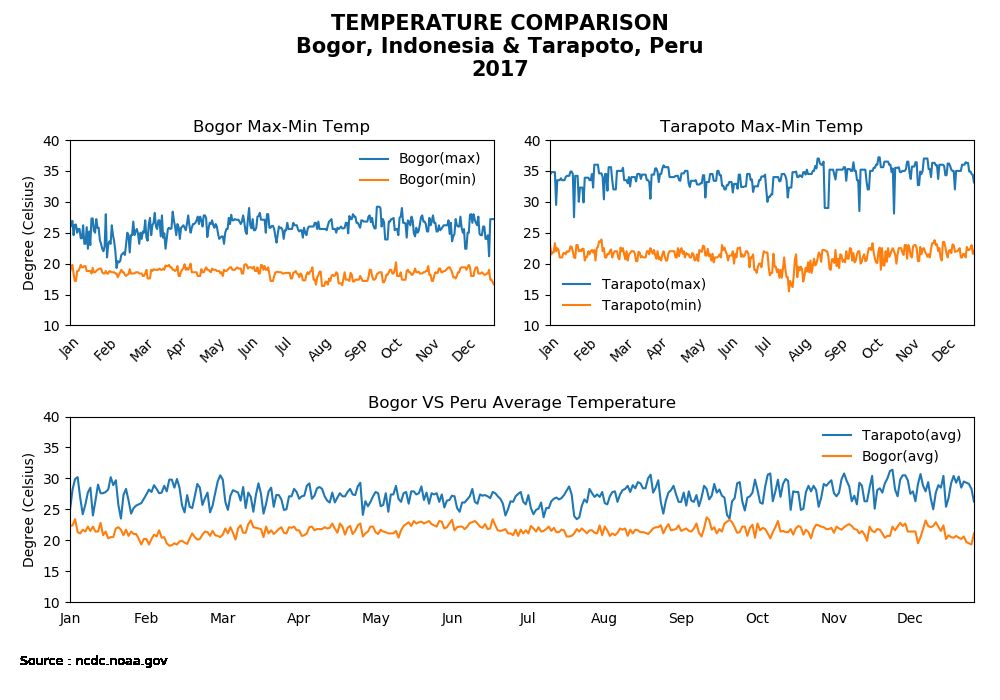

In [180]:
def anim(curr):
    stim = np.arange(0, 372, 4)
    n = stim[curr]
    if n > 366:
        a.event_source.stop()
        
    # clear axes
    top1.cla()
    top2.cla()
    lower.cla()
    
    # Draw the plots
    top1.plot(bogor_tmax[:n], '-', label='Bogor(max)')
    top1.plot(bogor_tmin[:n], '-', label='Bogor(min)')
    top2.plot(tarapoto_tmax[:n], '-', label='Tarapoto(max)')
    top2.plot(tarapoto_tmin[:n], '-', label='Tarapoto(min)')
    lower.plot(tarapoto_avg[:n], '-', label='Tarapoto(avg)')
    lower.plot(bogor_avg[:n], '-', label='Bogor(avg)')
    
    top1.legend(frameon=False)
    top2.legend(frameon=False, loc=3)
    lower.legend(frameon=False, loc=1)

    top1.xaxis.set_major_locator(plt.MaxNLocator(13.5))
    top2.xaxis.set_major_locator(plt.MaxNLocator(13.5))
    lower.xaxis.set_major_locator(plt.MaxNLocator(13.5))

    top1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    top2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    lower.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    top1.set_ylabel('Degree (Celsius)')
    lower.set_ylabel('Degree (Celsius)')

    top1.set_ylim(10, 40)
    top2.set_ylim(10, 40)
    lower.set_ylim(10, 40)

    top1.set_xlim(0, 355)
    top2.set_xlim(0, 355)
    lower.set_xlim(0, 355)

    for item in top1.xaxis.get_ticklabels():
        item.set_rotation(45)
    for item in top2.xaxis.get_ticklabels():
        item.set_rotation(45)
        
    top1.tick_params(bottom=False)
    top2.tick_params(bottom=False)
    lower.tick_params(bottom=False)
        
    # Entitle the plots
    fig.suptitle('TEMPERATURE COMPARISON\nBogor, Indonesia & Tarapoto, Peru\n2017', fontweight='bold', fontsize=15)
    top1.set_title('Bogor Max-Min Temp')
    top2.set_title('Tarapoto Max-Min Temp')
    lower.set_title('Bogor VS Peru Average Temperature')
    plt.gcf().text(0.02, 0.05, 'Source : ncdc.noaa.gov', fontsize=9)

    # Fill the gap with series!
    top1.fill_between(range(n), bgr_min[:n], bgr_max[:n],
                      facecolor='g', alpha=0.17)
    top2.fill_between(range(n), tar_min[:n], tar_max[:n],
                      facecolor='r', alpha=0.17)
    lower.fill_between(range(n), tar_avg[:n], bgr_avg[:n],
                       facecolor='grey', alpha=0.17)
    
    # Adjust the plots
    fig.subplots_adjust(top=0.8, bottom=0.14, left=0.07)

# Create the Gridspec!
fig = plt.figure(figsize=[10, 7])
gspec = gridspec.GridSpec(2, 2)
top1 = plt.subplot(gspec[0, 0])
top2 = plt.subplot(gspec[0, 1])
lower = plt.subplot(gspec[1, 0:])
fig.tight_layout(h_pad=7)
    
# Get series
bgr_max = bogor_tmax.reset_index()['TMAX']
bgr_min = bogor_tmin.reset_index()['TMIN']
tar_max = tarapoto_tmax.reset_index()['TMAX']
tar_min = tarapoto_tmin.reset_index()['TMIN']
bgr_avg = bogor_avg.reset_index()['TAVG']
tar_avg = tarapoto_avg.reset_index()['TAVG'].iloc[:363]

# Animate the plot!
a = animation.FuncAnimation(fig, anim, interval=90, blit=True)

In [ ]:
def anim(curr):
    stim = np.arange(0, 372, 4)
    n = stim[curr]
    if n > 366:
        a.event_source.stop()
        
    # clear axes
    top1.cla()
    top2.cla()
    lower.cla()
    
    # Draw the plots
    top1.plot(bogor_tmax[:n], '-', label='Bogor(max)')
    top1.plot(bogor_tmin[:n], '-', label='Bogor(min)')
    top2.plot(tarapoto_tmax[:n], '-', label='Tarapoto(max)')
    top2.plot(tarapoto_tmin[:n], '-', label='Tarapoto(min)')
    lower.plot(tarapoto_avg[:n], '-', label='Tarapoto(avg)')
    lower.plot(bogor_avg[:n], '-', label='Bogor(avg)')
    
    top1.legend(frameon=False)
    top2.legend(frameon=False, loc=3)
    lower.legend(frameon=False, loc=1)

    top1.xaxis.set_major_locator(plt.MaxNLocator(13.5))
    top2.xaxis.set_major_locator(plt.MaxNLocator(13.5))
    lower.xaxis.set_major_locator(plt.MaxNLocator(13.5))

    top1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    top2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    lower.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    top1.set_ylabel('Degree (Celsius)')
    lower.set_ylabel('Degree (Celsius)')

    top1.set_ylim(10, 40)
    top2.set_ylim(10, 40)
    lower.set_ylim(10, 40)

    top1.set_xlim(0, 355)
    top2.set_xlim(0, 355)
    lower.set_xlim(0, 355)

    for item in top1.xaxis.get_ticklabels():
        item.set_rotation(45)
    for item in top2.xaxis.get_ticklabels():
        item.set_rotation(45)
        
    top1.tick_params(bottom=False)
    top2.tick_params(bottom=False)
    lower.tick_params(bottom=False)
        
    # Entitle the plots
    fig.suptitle('TEMPERATURE COMPARISON\nBogor, Indonesia & Tarapoto, Peru\n2017', fontweight='bold', fontsize=15)
    top1.set_title('Bogor Max-Min Temp')
    top2.set_title('Tarapoto Max-Min Temp')
    lower.set_title('Bogor VS Peru Average Temperature')
    plt.gcf().text(0.02, 0.05, 'Source : ncdc.noaa.gov', fontsize=9)

    # Fill the gap with series!
    top1.fill_between(range(n), bgr_min[:n], bgr_max[:n],
                      facecolor='g', alpha=0.17)
    top2.fill_between(range(n), tar_min[:n], tar_max[:n],
                      facecolor='r', alpha=0.17)
    lower.fill_between(range(n), tar_avg[:n], bgr_avg[:n],
                       facecolor='grey', alpha=0.17)
    
    # Adjust the plots
    fig.subplots_adjust(top=0.8, bottom=0.14, left=0.07)

# Create the Gridspec!
fig = plt.figure(figsize=[10, 7])
gspec = gridspec.GridSpec(2, 2)
top1 = plt.subplot(gspec[0, 0])
top2 = plt.subplot(gspec[0, 1])
lower = plt.subplot(gspec[1, 0:])
fig.tight_layout(h_pad=7)
    
# Get series
bgr_max = bogor_tmax.reset_index()['TMAX']
bgr_min = bogor_tmin.reset_index()['TMIN']
tar_max = tarapoto_tmax.reset_index()['TMAX']
tar_min = tarapoto_tmin.reset_index()['TMIN']
bgr_avg = bogor_avg.reset_index()['TAVG']
tar_avg = tarapoto_avg.reset_index()['TAVG'].iloc[:363]

# Animate the plot!
a = animation.FuncAnimation(fig, anim, interval=70, blit=True)

a.save('Assignment4.gif')